# Preprocessing Notebook - Group 15

## Load and inspect data

In [2]:
# Import the necessary libraries
# Importing Numpy as np
import numpy as np
# Importing pandas as pd
import pandas as pd
# Importing Matplotlibrary's PyPlot as plt
import matplotlib.pyplot as plt
# Importing seaborn as sns
import seaborn as sns

In [3]:
#iData = pd.read_csv('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
pd.set_option('display.max_columns', 500)
iData = pd.read_csv('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
iData.head(3)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize


In [4]:
iData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

# Feature Engineering

## New Feature : Profit Margin

Profit Margin for a customer is generally calculated as the difference between Sales and loss per customer 

In this case, sales is in the form of premium amount which is paid monthly & loss is in the form of claim payment.

So, Margin = (No of months in which the premium is paid x Policy amount) - Claim amount

In [5]:
iData['Effective To Date'].dtype

dtype('O')

In [6]:
# Convert the effective date column from 'object' to 'datetime' format
Premium_Start_month =[]
temp2 =[]
iData['Effective To Date'] =  pd.to_datetime(iData['Effective To Date'])
Premium_Start_month = iData['Effective To Date'].dt.month.to_list()

# No of months in which policy is paid in a year = 13 - start_month
for ind, i in zip(iData.index, Premium_Start_month):
    temp2.append(((13-i)*iData['Monthly Premium Auto'][ind])-(iData['Total Claim Amount'][ind]))
        
iData['Profit Margin'] = temp2
iData['Profit Margin'] = iData['Profit Margin'].round(decimals = 2)
iData.head(3)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Profit Margin
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,374.19
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,-3.46
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,621.53


# New Feature : Income Class

The Income for a customer is given as a continuos variable occupying any value ranging from 0 to 100000.

So, we are adding a new feature which classifies every customer under the "Low" , "medium" or "High" income group.

In [7]:
# Income Groups 
# 0-20K      - "Low income", 
# 200001-60K - "Medium income"
# Above 60K  - High Income 
temp4 =[]
for ind in iData.index:
    if (iData.Income[ind] >= 0) and (iData.Income[ind] <= 20000):
        temp4.append("L")
    elif(iData.Income[ind] > 20000) and (iData.Income[ind] <= 60000):
        temp4.append("M")
    elif(iData.Income[ind] > 60000):
        temp4.append("H")
        
iData['Income Class'] = temp4
iData.head(5)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Profit Margin,Income Class
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,374.19,M
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,-3.46,L
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,621.53,M
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,742.12,L
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,664.87,M


In [9]:
print ( " No of people in each income class  " )
iData['Income Class'].value_counts().to_frame()

 No of people in each income class  


,Income Class
M,3814
L,2839
H,2481


### Outlier reduction

 We'll plot the data and see if there are any significant ouliers present

The removal of outliers needs to be done only if they exists in a very negligible amount compared to the overall distribution of data

In [10]:
# Initialize and add required numeric columns
cols = []
for i in iData.columns:
    if (iData[i].dtype == 'float64') or (iData[i].dtype == 'int64'):
        cols.append(i)

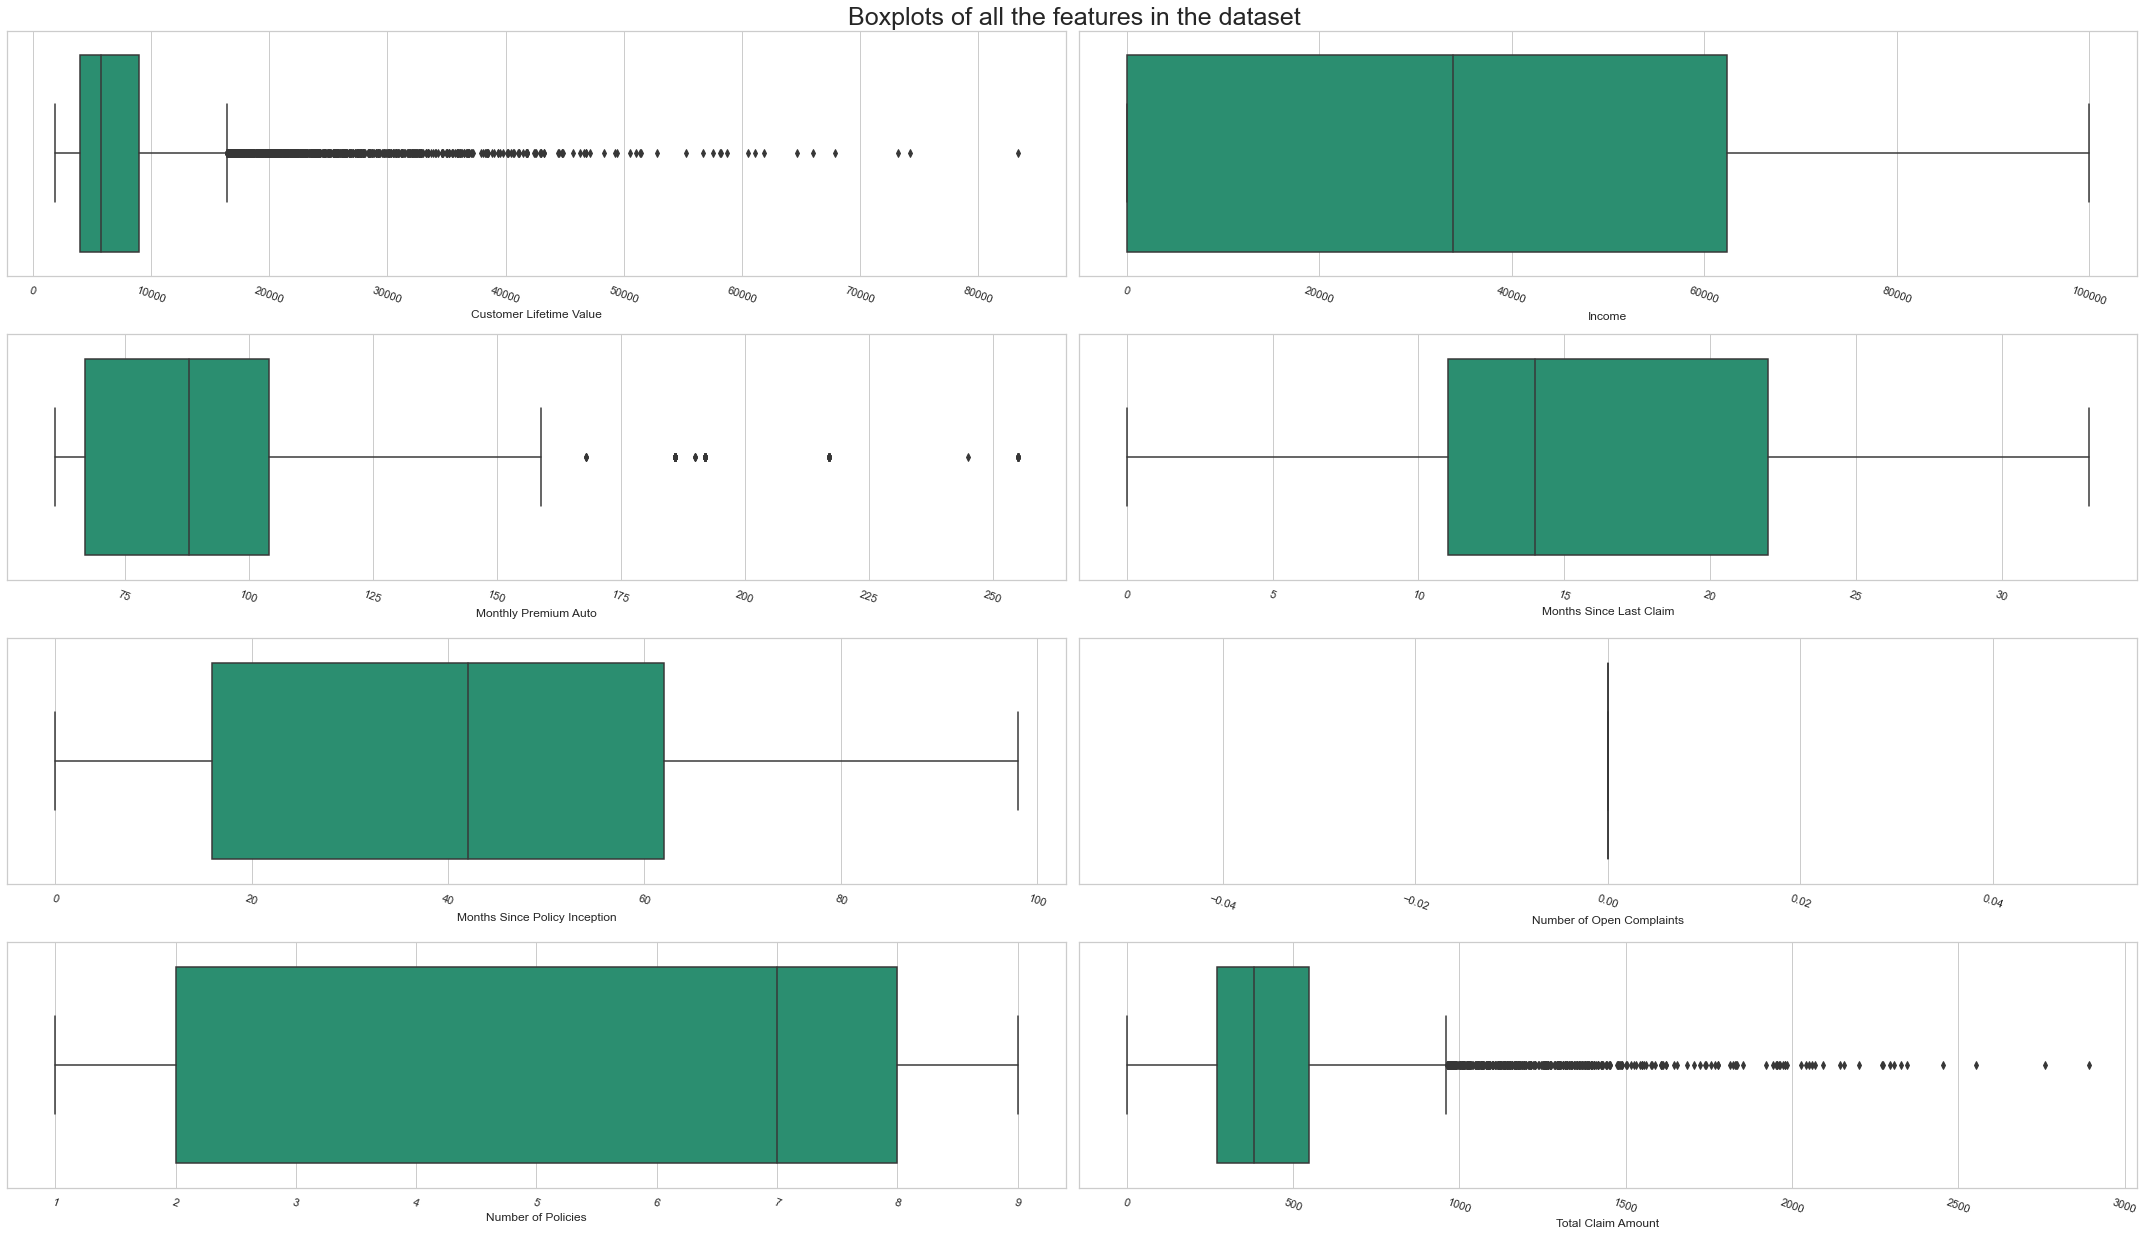

In [20]:
# create the figure and axes
fig, axes = plt.subplots(4, 2, figsize=(30, 17.5))
# Setting the sns plot theme
sns.set_theme(style="whitegrid", palette="Dark2")
# Giving a plot title
fig.suptitle('Boxplots of all the features in the dataset', fontsize=25)
# For making indexing easier, creating a contiguous flattened array
axes = axes.ravel()
 
for col, ax in zip(cols, axes):
    sns.boxplot(data=iData[col], x=iData[col], ax=ax)
    ax.tick_params(axis='x', rotation=340)
 
fig.tight_layout()
plt.show()

1. Outliers exists for "Customer life-time value", "Monthly premium auto" and "Total Claim amount"

2. We are ignoring the outliers for "Customer lifetime value" since it is one of targets intended for prediction after ML modelling.

3. The points shown as outliers in "Monthly premium auto" should not be ignored as these are high monthly premium amounts paid by the customer which bring high revenue for the company.

4. The outliers shown for "Total claim amount" is quite high. Some of these can be analyzed to see the amount of profit which these customers provide to the company.If the profit-margin on these cusomers is low, they can be treated as true outliers and can be ignored from future analysis and modelling.

In [21]:
# calculating quarlities based on 30 , 60 and 95 percentile distribution
Q1=np.percentile(iData['Total Claim Amount'],30,interpolation='midpoint')
Q2=np.percentile(iData['Total Claim Amount'],60,interpolation='midpoint')
Q3=np.percentile(iData['Total Claim Amount'],95,interpolation='midpoint')
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim=Q3+1.5*IQR
outliers=[]
for i in iData['Total Claim Amount']:
    if i > up_lim:
        outliers.append(i)

print(len(outliers),'possible Oulier(s) is(are) there in Total Claim Amount column and they are given below:\n',outliers)

28 possible Oulier(s) is(are) there in Total Claim Amount column and they are given below:
 [2345.413441, 2027.724442, 2893.239678, 1965.6, 2201.327879, 2294.631639, 2327.166394, 1980.0, 2552.343856, 2042.569089, 2759.794354, 1979.444237, 2270.508697, 1956.368115, 2052.0, 1972.8, 1961.162049, 2306.508397, 2145.6, 1953.87972, 2069.309854, 2156.011022, 1985.999807, 2092.523421, 2275.265075, 2059.2, 2452.894264, 1950.725547]


In [22]:
# Removing outliers from Total claim amount where profit margin is less than 200 dollars in a year
filtered_dataset = iData.loc[iData['Total Claim Amount']>up_lim]
# filtered_dataset[['Total Claim Amount','Profit Margin']].describe()
outliers = filtered_dataset['Profit Margin']<200
outlier_indexes = filtered_dataset.loc[outliers].index.tolist()
print('Indexes of Oulier(s) in Total Claim Amount column are given below:\n',outlier_indexes)

Indexes of Oulier(s) in Total Claim Amount column are given below:
 [888, 1626, 3557, 4930, 4964, 5074, 5773, 7136, 7250, 7978, 8105, 8275, 8684, 8825]


In [23]:
iData.drop([888, 1626, 3557, 4930, 4964, 5074, 5773, 7136, 7250, 7978, 8105, 8275, 8684, 8825],inplace=True)
iData.head(3)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Profit Margin,Income Class
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,374.19,M
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,-3.46,L
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,621.53,M


# Feature reduction 
 The columns : Customer, Customer Lifetime Value (t), Response (t), Effective To Date, Gender, Marital Status, Policy Type, Renew Offer Type (t), Vehicle Size are not considered as features since they belong to the target or do not contribute any significant role in prediction 

In [24]:
iData = iData.drop(['Customer','Customer Lifetime Value', 'Response', 'Effective To Date', 'Gender', 'Marital Status', 'Policy Type', 'Renew Offer Type', 'Total Claim Amount', 'Vehicle Size'], axis = 1)
iData.head(5)

,State,Coverage,Education,EmploymentStatus,Income,Location Code,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy,Sales Channel,Vehicle Class,Profit Margin,Income Class
0,Washington,Basic,Bachelor,Employed,56274,Suburban,69,32,5,0,1,Corporate L3,Agent,Two-Door Car,374.19,M
1,Arizona,Extended,Bachelor,Unemployed,0,Suburban,94,13,42,0,8,Personal L3,Agent,Four-Door Car,-3.46,L
2,Nevada,Premium,Bachelor,Employed,48767,Suburban,108,18,38,0,2,Personal L3,Agent,Two-Door Car,621.53,M
3,California,Basic,Bachelor,Unemployed,0,Suburban,106,18,65,0,7,Corporate L2,Call Center,SUV,742.12,L
4,Washington,Basic,Bachelor,Employed,43836,Rural,73,12,44,0,1,Personal L1,Agent,Four-Door Car,664.87,M


# Feature correlation

<AxesSubplot:>

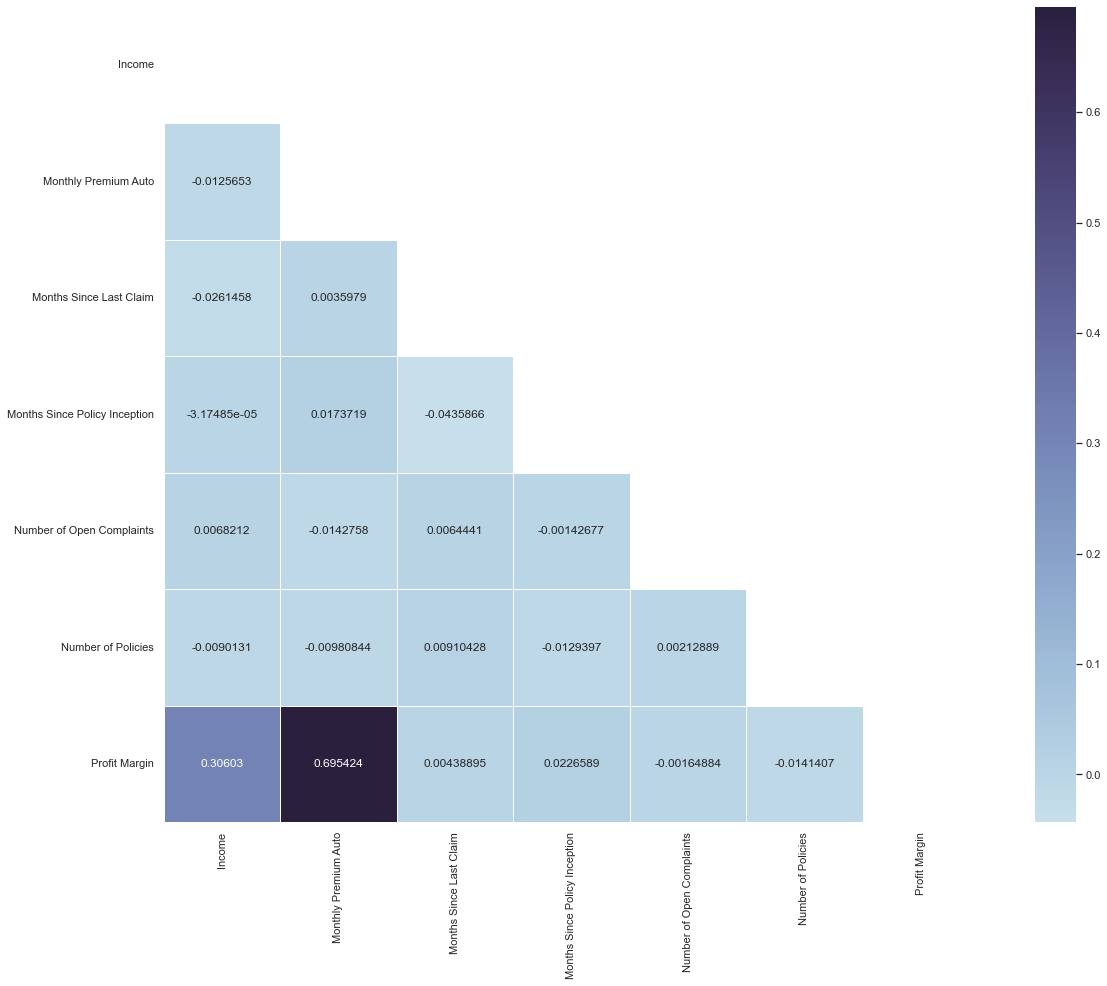

In [25]:

corrmatrix = iData.corr()
plt.subplots(figsize=(20,15))
colormap = sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
sns.set_theme(style='dark')
# Generating a mask for the upper triangle
mask = np.zeros_like(corrmatrix)
mask[np.triu_indices_from(mask)] = True
# Heatmap with the mask
sns.heatmap(corrmatrix, mask=mask, square=True, annot=True, linewidth=0.75, cmap=colormap, fmt='g')

# Label encoding the categorical features

In [26]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
mapping =[]
targets = ['State','Coverage','Education','EmploymentStatus','Location Code','Policy','Sales Channel','Vehicle Class', 'Income Class']
for i in targets:
    iData[i] = labelencoder.fit_transform(iData[i])
    lemap = dict(zip(labelencoder.classes_,labelencoder.transform(labelencoder.classes_)))
    mapping.append(lemap)

In [27]:
print('Mapped labels are {}'.format(mapping))

Mapped labels are [{'Arizona': 0, 'California': 1, 'Nevada': 2, 'Oregon': 3, 'Washington': 4}, {'Basic': 0, 'Extended': 1, 'Premium': 2}, {'Bachelor': 0, 'College': 1, 'Doctor': 2, 'High School or Below': 3, 'Master': 4}, {'Disabled': 0, 'Employed': 1, 'Medical Leave': 2, 'Retired': 3, 'Unemployed': 4}, {'Rural': 0, 'Suburban': 1, 'Urban': 2}, {'Corporate L1': 0, 'Corporate L2': 1, 'Corporate L3': 2, 'Personal L1': 3, 'Personal L2': 4, 'Personal L3': 5, 'Special L1': 6, 'Special L2': 7, 'Special L3': 8}, {'Agent': 0, 'Branch': 1, 'Call Center': 2, 'Web': 3}, {'Four-Door Car': 0, 'Luxury Car': 1, 'Luxury SUV': 2, 'SUV': 3, 'Sports Car': 4, 'Two-Door Car': 5}, {'H': 0, 'L': 1, 'M': 2}]


# Correlation Matrix

<AxesSubplot:>

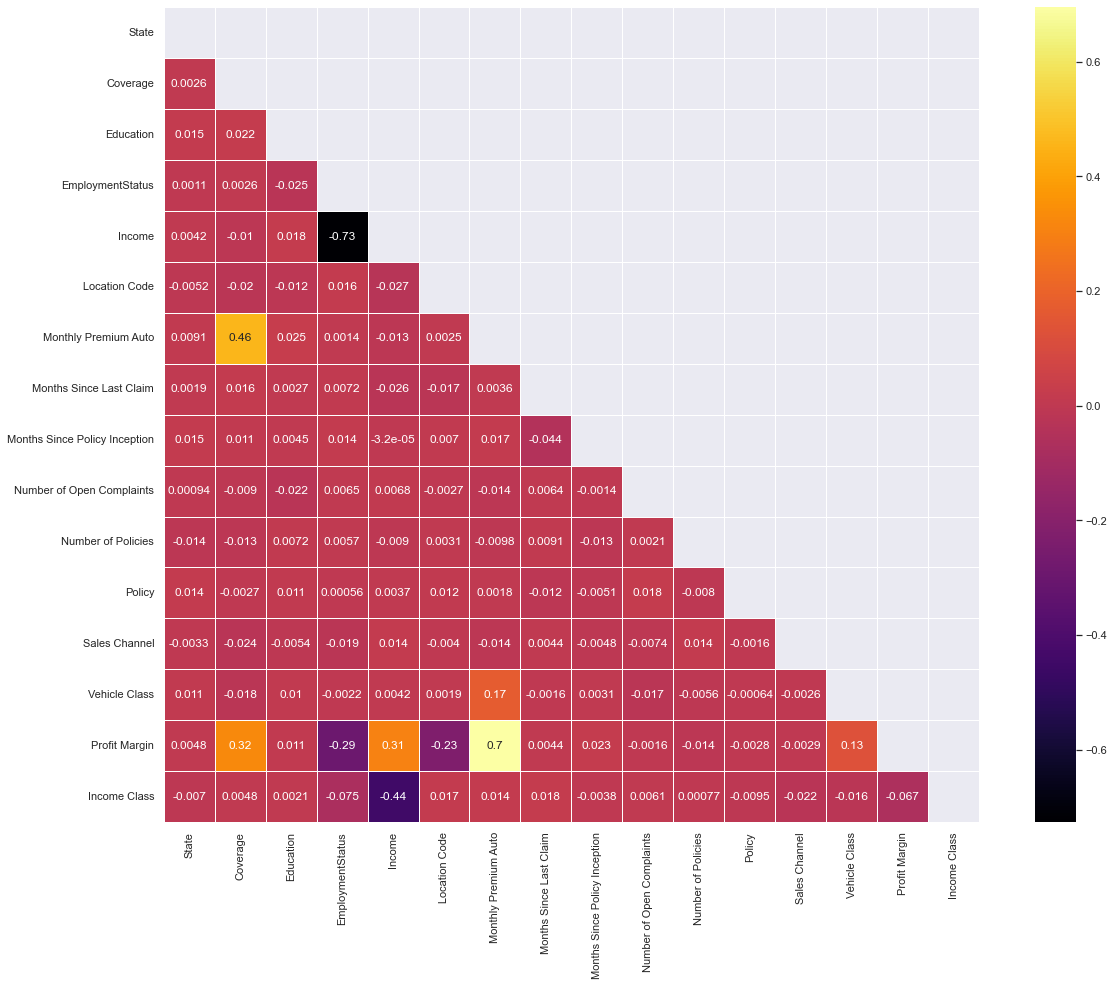

In [28]:
corrmatrix = iData.corr()
plt.subplots(figsize=(20,15))
colormap = sns.color_palette("inferno", as_cmap=True)
sns.set_theme(style='darkgrid')
# Generating a mask for the upper triangle
mask = np.zeros_like(corrmatrix)
mask[np.triu_indices_from(mask)] = True
# Heatmap with the mask
sns.heatmap(corrmatrix,mask=mask, square=True, annot=True, linewidth=0.75, cmap=colormap)

High positive correlation between "Monthly Premium Auto" and "Profit Margin" - so we drop "Profit Margin" as it is already a dependant on Monthly premium auto.

Income & Employment status is highly correlated. So we are dropping income column and also we have divided the income into 3 different classes which bring more value in further modelling

In [29]:
iData = iData.drop(['Income','Profit Margin'], axis = 1)

In [30]:
iData.head(5)

,State,Coverage,Education,EmploymentStatus,Location Code,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy,Sales Channel,Vehicle Class,Income Class
0,4,0,0,1,1,69,32,5,0,1,2,0,5,2
1,0,1,0,4,1,94,13,42,0,8,5,0,0,1
2,2,2,0,1,1,108,18,38,0,2,5,0,5,2
3,1,0,0,4,1,106,18,65,0,7,1,2,3,1
4,4,0,0,1,0,73,12,44,0,1,3,0,0,2
